> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',12)

# Configuração do Matplotlib
plt.style.use('ggplot')

# Configuração do Seaborn
sns.set_theme(style='darkgrid')

wcwomen_df = pd.read_csv('matches_1991_2023.csv')
wcmen_df   = pd.read_csv('matches_1930_2022.csv')
wc = pd.concat((wcwomen_df,wcmen_df)).reset_index()

nomes_traduzidos = {'home_team': 'time_1', 'away_team': 'time_2', 'home_score': 'gols_1', 'away_score': 'gols_2',
                    'Date': 'data', 'Year': 'ano', 'Host': 'país_sede', 'Attendance': 'comparecimento',
                    'Score': 'resultado', 'Round': 'rodada', 'home_goal': 'gols_1_detalhes', 'away_goal': 'gols_2_detalhes',
                    'home_own_goal': 'gols_1_contra', 'away_own_goal': 'gols_2_contra',
                    'home_penalty_goal': 'gols_1_penalti', 'away_penalty_goal': 'gols_2_penalti',
                    'home_red_card': 'cartao_vermelho_1', 'away_red_card': 'cartao_vermelho_2',
                    'home_yellow_card_long': 'cartao_amarelo_1', 'away_yellow_card_long': 'cartao_amarelo_2'}

wc = wc.loc[:, nomes_traduzidos.keys()]
wc.columns = nomes_traduzidos.values()

copa = wc['ano'].apply( lambda x: 'Masculina' if x % 2 == 0 else 'Feminina').astype('string')
wc['copa'] = copa
display(wc)



,time_1,time_2,gols_1,gols_2,data,ano,país_sede,comparecimento,resultado,rodada,gols_1_detalhes,gols_2_detalhes,gols_1_contra,gols_2_contra,gols_1_penalti,gols_2_penalti,cartao_vermelho_1,cartao_vermelho_2,cartao_amarelo_1,cartao_amarelo_2,copa
0,Spain,England,1,0,2023-08-20,2023,"Australia, New Zealand",75784,1–0,Final,Olga Carmona · 29’,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['78’|1:0|Salma Paralluelo'],['55’|1:0|Lauren Hemp'],Feminina
1,Sweden,Australia,2,0,2023-08-19,2023,"Australia, New Zealand",49461,2–0,Third-place match,Kosovare Asllani · 62’,NaN,NaN,NaN,Fridolina Rolfö (P) · 30’,NaN,NaN,NaN,"['88’|2:0|Elin Rubensson', '90+5’|2:0|Lina Hur...",['45+1’|1:0|Katrina Gorry'],Feminina
2,Australia,England,1,3,2023-08-16,2023,"Australia, New Zealand",75784,1–3,Semi-finals,Sam Kerr · 63’,Ella Toone · 36’|Lauren Hemp · 71’|Alessia Rus...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['10’|0:0|Alex Greenwood', '90+5’|1:3|Chloe Ke...",Feminina
3,Spain,Sweden,2,1,2023-08-15,2023,"Australia, New Zealand",43217,2–1,Semi-finals,Salma Paralluelo · 81’|Olga Carmona · 89’,Rebecka Blomqvist · 88’,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminina
4,Australia,France,0,0,2023-08-12,2023,"Australia, New Zealand",49461,(7) 0–0 (6),Quarter-finals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['92’|0:0|Katrina Gorry'],NaN,Feminina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Argentina,France,1,0,1930-07-15,1930,Uruguay,23409,1–0,Group stage,Luis Monti · 81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masculina
1308,Yugoslavia,Brazil,2,1,1930-07-14,1930,Uruguay,24059,2–1,Group stage,Aleksandar Tirnanić · 21|Ivan Bek · 30,Preguinho · 62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masculina
1309,Romania,Peru,3,1,1930-07-14,1930,Uruguay,2549,3–1,Group stage,Adalbert Deșu · 1|Constantin Stanciu · 79|Nico...,Luis de Souza Ferreira · 75,NaN,NaN,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,Masculina
1310,United States,Belgium,3,0,1930-07-13,1930,Uruguay,18346,3–0,Group stage,Bart McGhee · 23|Tom Florie · 45|Bert Patenaud...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masculina


#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

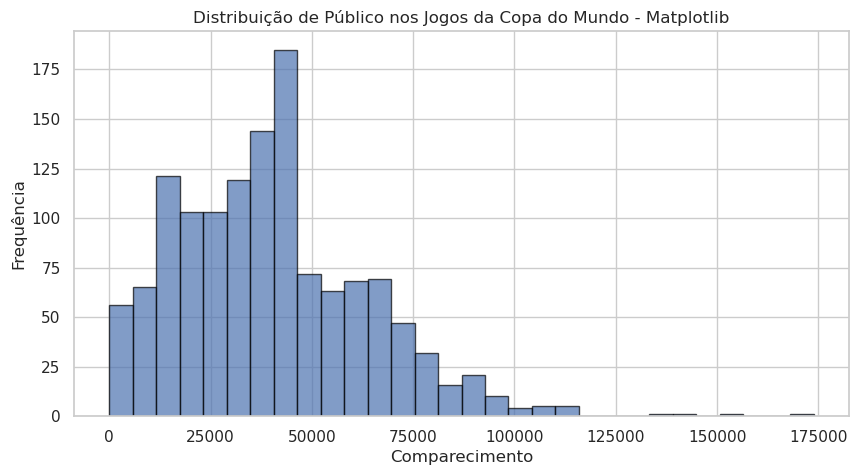

In [27]:
#### Solução com matplotlib

plt.figure(figsize=(10, 5))
plt.hist(wc['comparecimento'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Público nos Jogos da Copa do Mundo - Matplotlib')
plt.xlabel('Comparecimento')
plt.ylabel('Frequência')
plt.show()


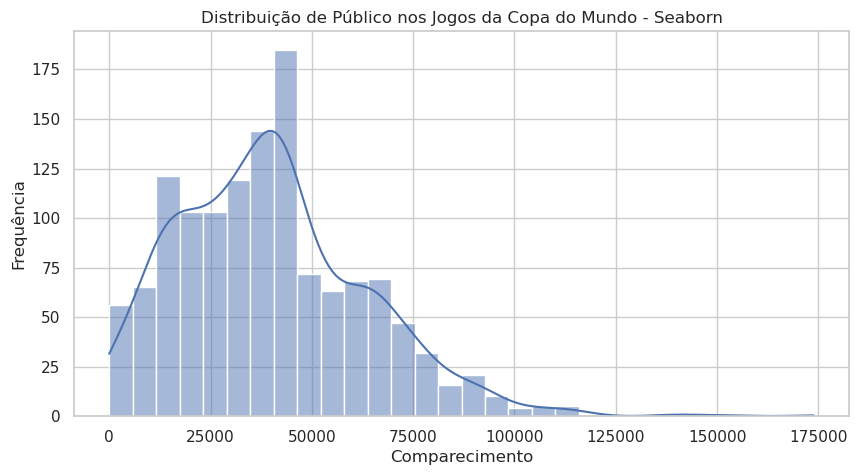

In [29]:
#### solução com seaborn
plt.figure(figsize=(10, 5))
sns.histplot(wc['comparecimento'], bins=30, kde=True)
plt.title('Distribuição de Público nos Jogos da Copa do Mundo - Seaborn')
plt.xlabel('Comparecimento')
plt.ylabel('Frequência')
plt.show()

In [31]:
#### solução com plotly
fig = px.histogram(wc, x='comparecimento', nbins=30, title='Distribuição de Público nos Jogos da Copa do Mundo - Plotly')
fig.update_layout(xaxis_title='Comparecimento', yaxis_title='Frequência')
fig.show()


#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

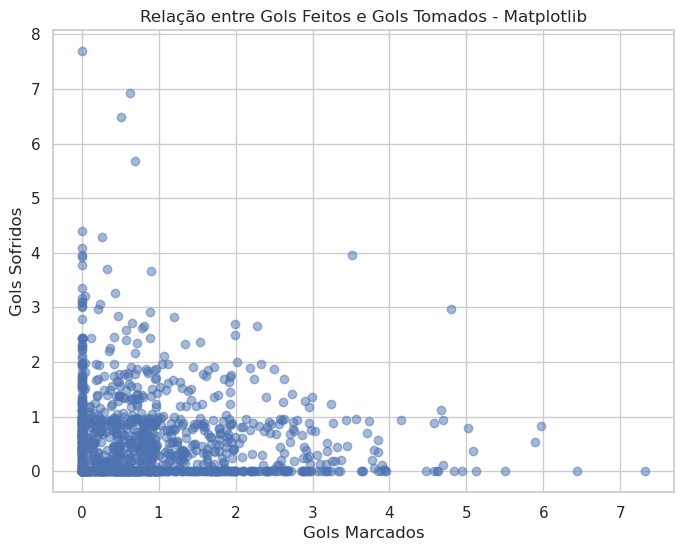

In [ ]:
#### solução com matplotlib
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

plt.figure(figsize=(8, 6))
plt.scatter(gols['gols_1'], gols['gols_2'], alpha=0.5)
plt.title('Relação entre Gols Feitos e Gols Tomados - Matplotlib')
plt.xlabel('Gols Marcados')
plt.ylabel('Gols Sofridos')
plt.show()


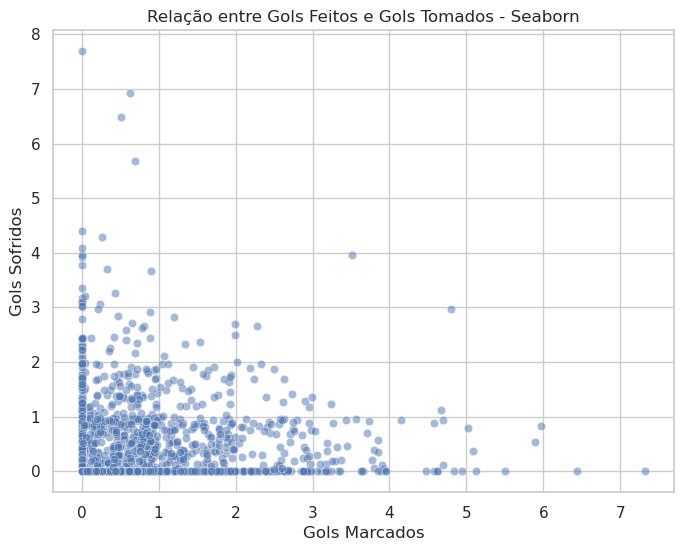

In [33]:
#### solução com seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=gols['gols_1'], y=gols['gols_2'], alpha=0.5)
plt.title('Relação entre Gols Feitos e Gols Tomados - Seaborn')
plt.xlabel('Gols Marcados')
plt.ylabel('Gols Sofridos')
plt.show()


In [34]:
#### solução com plotly
fig = px.scatter(gols, x='gols_1', y='gols_2', title='Relação entre Gols Feitos e Gols Tomados - Plotly', opacity=0.5)
fig.update_layout(xaxis_title='Gols Marcados', yaxis_title='Gols Sofridos')
fig.show()



#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

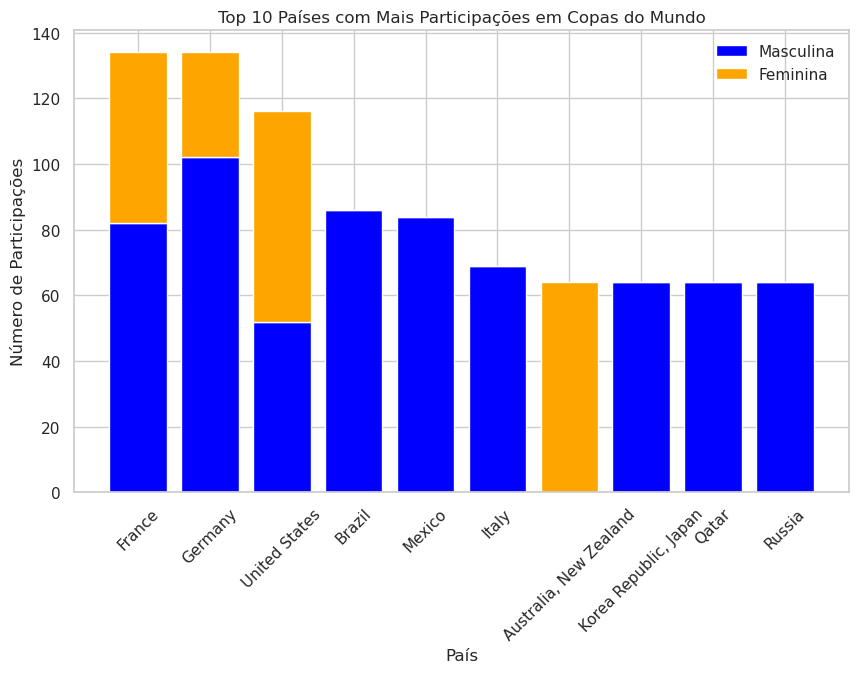

In [35]:
#### solução com matplotlib

# Contagem de participações por país e tipo de copa
participacoes = wc.groupby(['país_sede', 'copa']).size().unstack(fill_value=0)
top_10_paises = participacoes.sum(axis=1).nlargest(10).index
top_10 = participacoes.loc[top_10_paises]

# Gráfico de barras empilhadas com Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10.index, top_10['Masculina'], label='Masculina', color='blue')
ax.bar(top_10.index, top_10['Feminina'], bottom=top_10['Masculina'], label='Feminina', color='orange')
ax.set_title('Top 10 Países com Mais Participações em Copas do Mundo')
ax.set_xlabel('País')
ax.set_ylabel('Número de Participações')
ax.legend()
plt.xticks(rotation=45)
plt.show()

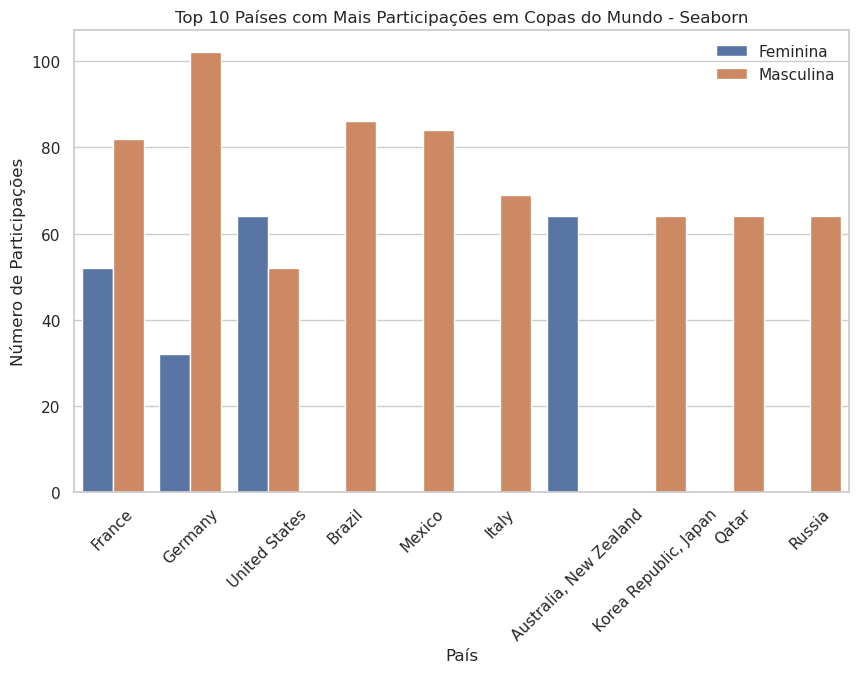

In [36]:
#### solução com seaborn
top_10.reset_index(inplace=True)
top_10_melted = top_10.melt(id_vars='país_sede', var_name='Tipo de Copa', value_name='Participações')
plt.figure(figsize=(10, 6))
sns.barplot(x='país_sede', y='Participações', hue='Tipo de Copa', data=top_10_melted)
plt.title('Top 10 Países com Mais Participações em Copas do Mundo - Seaborn')
plt.xlabel('País')
plt.ylabel('Número de Participações')
plt.xticks(rotation=45)
plt.legend()

In [37]:
#### solução com plotly
fig = px.bar(top_10_melted, x='país_sede', y='Participações', color='Tipo de Copa', barmode='stack',
             title='Top 10 Países com Mais Participações em Copas do Mundo - Plotly')
fig.update_layout(xaxis_title='País', yaxis_title='Número de Participações')
fig.show()


#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

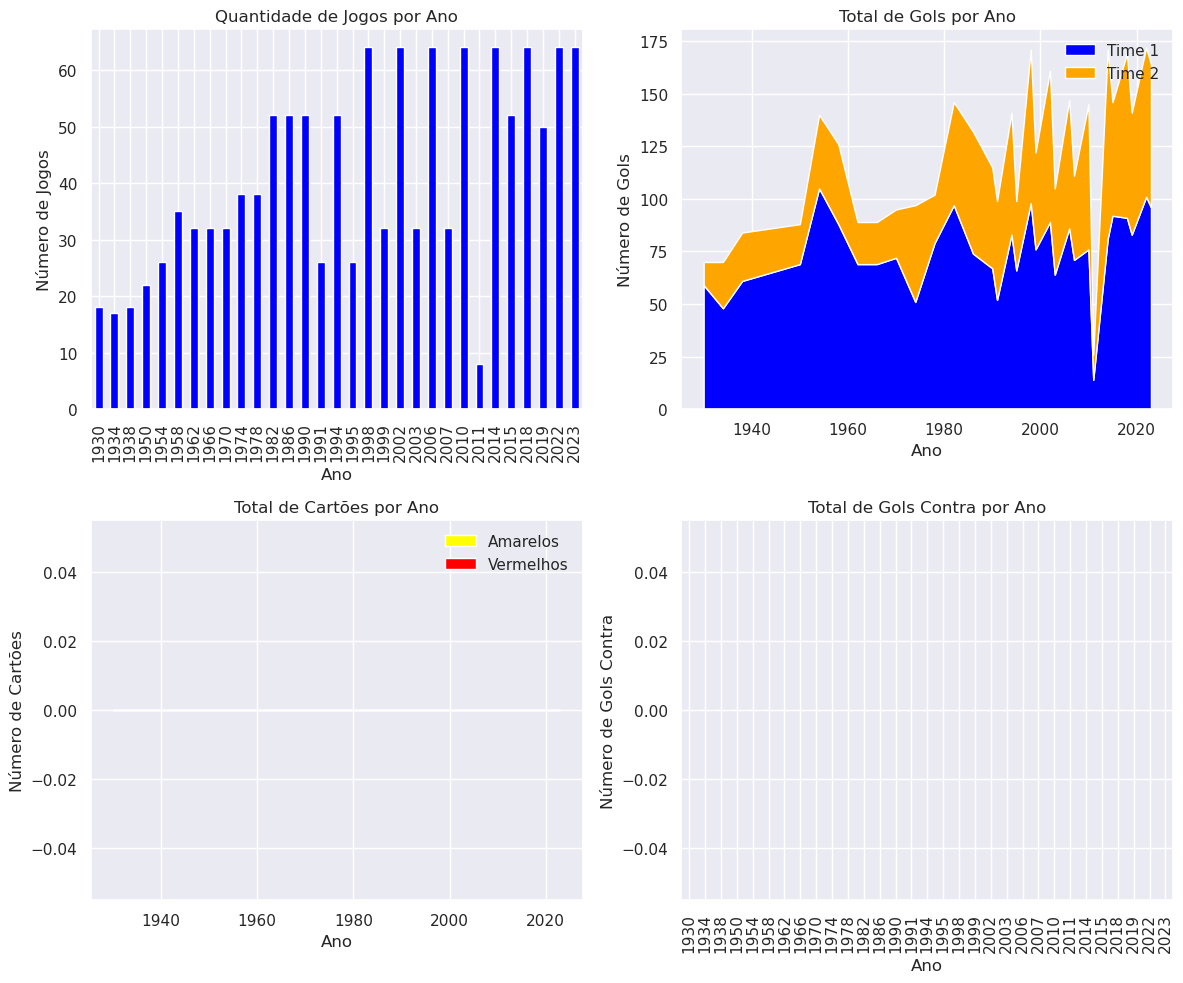

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que 'ano' seja numérico
wc['ano'] = pd.to_numeric(wc['ano'], errors='coerce')

# Garantir que colunas relevantes sejam numéricas e substituir NaN por 0
cols_numericas = ['gols_1', 'gols_2', 'cartao_amarelo_1', 'cartao_amarelo_2', 
                  'cartao_vermelho_1', 'cartao_vermelho_2', 'gols_1_contra', 'gols_2_contra']
wc[cols_numericas] = wc[cols_numericas].apply(pd.to_numeric, errors='coerce').fillna(0)

# Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de barras com a quantidade de jogos por ano
wc['ano'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Quantidade de Jogos por Ano')
axes[0, 0].set_xlabel('Ano')
axes[0, 0].set_ylabel('Número de Jogos')

# Gráfico de área com total de gols por ano
gols_por_ano = wc.groupby('ano')[['gols_1', 'gols_2']].sum()
axes[0, 1].stackplot(gols_por_ano.index, gols_por_ano['gols_1'], gols_por_ano['gols_2'], labels=['Time 1', 'Time 2'], colors=['blue', 'orange'])
axes[0, 1].set_title('Total de Gols por Ano')
axes[0, 1].set_xlabel('Ano')
axes[0, 1].set_ylabel('Número de Gols')
axes[0, 1].legend()

# Gráfico de área com total de cartões por ano
cartoes_por_ano = wc.groupby('ano')[['cartao_amarelo_1', 'cartao_amarelo_2', 'cartao_vermelho_1', 'cartao_vermelho_2']].sum()
cartoes_amarelos = cartoes_por_ano['cartao_amarelo_1'] + cartoes_por_ano['cartao_amarelo_2']
cartoes_vermelhos = cartoes_por_ano['cartao_vermelho_1'] + cartoes_por_ano['cartao_vermelho_2']
axes[1, 0].stackplot(cartoes_por_ano.index, cartoes_amarelos, cartoes_vermelhos, labels=['Amarelos', 'Vermelhos'], colors=['yellow', 'red'])
axes[1, 0].set_title('Total de Cartões por Ano')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Número de Cartões')
axes[1, 0].legend()

# Gráfico de barras com total de gols contra por ano
gols_contra_por_ano = wc.groupby('ano')[['gols_1_contra', 'gols_2_contra']].sum().sum(axis=1)
gols_contra_por_ano.plot(kind='bar', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Total de Gols Contra por Ano')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Número de Gols Contra')

plt.tight_layout()
plt.show()
